Yêu cầu: Chia tập dữ liệu thành 2 phần - huấn luyện và kiểm tra.

Kịch bản 1: Chọn ngẫu nhiên 40 mẫu hoa mỗi loại đưa vào tập huấn luyện (tổng cộng 120 mẫu). Dùng k-NN để xác định 30 mẫu còn lại thuộc loại nào và đánh giá độ chính xác accuracy trên tổng thể, precision và recall cho từng loại hoa. (k do học viên thử nghiệm và chọn).

Kịch bản 2: Chọn ngẫu nhiên 30 mẫu hoa mỗi loại đưa vào tập huấn luyện (tổng cộng 90 mẫu). Dùng k-NN để xác định 60 mẫu còn lại thuộc loại nào và đánh giá độ chính xác accuracy trên tổng thể, precision và recall cho từng loại hoa. (k bằng giá trị đã chọn ở trên).
Nhận xét về kết quả thu được.

**STEP1: XỬ LÝ DỮ LIỆU**

In [ ]:
#Import datasets and neighbors library
from sklearn import datasets, neighbors


In [ ]:
#Import dataset iris
iris = datasets.load_iris()

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# concatenate data from iris
data = np.hstack(( iris.data, np.reshape(iris.target,(150,1)) ))

In [ ]:
#Creat data frame of iris data
df = pd.DataFrame(data = data, columns = iris.feature_names+['target'])

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
#Check null data
pd.isnull(df).sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [ ]:
pd.isna(df).sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [ ]:
#Find outliers by boxplot
import seaborn as sns
import matplotlib.pyplot as plt


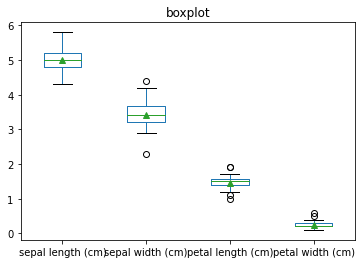

In [ ]:
#Kiểm tra outlier với loài 0
plot0 = df[df['target'] == 0][iris.feature_names].plot(kind='box', title='boxplot', showmeans=True)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


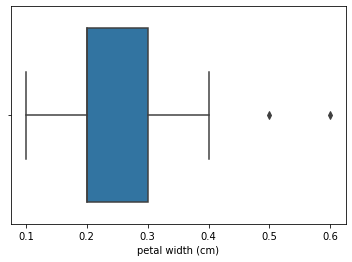

In [ ]:
sns.boxplot(df[df['target'] == 0].iloc[:, 3])

In [ ]:
outlier0 = df[df['target'] == 0][(( df.iloc[:, 1] > 4.2) | ( df.iloc[:, 1] < 2.5) | ( df.iloc[:, 2] > 1.8) | ( df.iloc[:, 2] < 1.2) )| ( df.iloc[:, 3] >= 0.5)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
outlier0

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
13,4.3,3.0,1.1,0.1,0.0
15,5.7,4.4,1.5,0.4,0.0
22,4.6,3.6,1.0,0.2,0.0
23,5.1,3.3,1.7,0.5,0.0
24,4.8,3.4,1.9,0.2,0.0
41,4.5,2.3,1.3,0.3,0.0
43,5.0,3.5,1.6,0.6,0.0
44,5.1,3.8,1.9,0.4,0.0


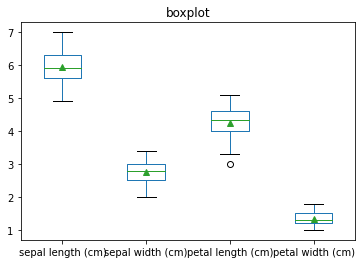

In [ ]:
#Kiểm tra outlier với loài 1
plot1 = df[df['target'] == 1][iris.feature_names].plot(kind='box', title='boxplot', showmeans=True)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


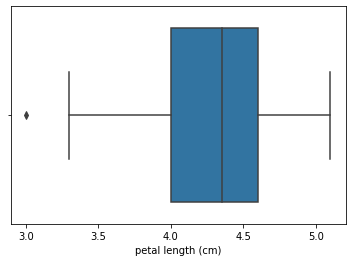

In [ ]:
sns.boxplot(df[df['target'] == 1].iloc[:, 2])

In [ ]:
outlier1 = df[df['target'] == 1][df.iloc[:, 2] <= 3]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
outlier1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
98,5.1,2.5,3.0,1.1,1.0


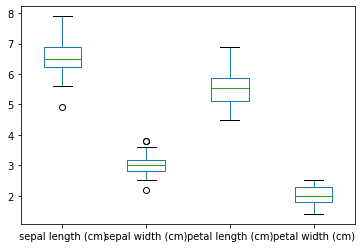

In [ ]:
#Kiểm tra outlier với loài 2
plot2 = df[df['target'] == 2][iris.feature_names].plot(kind='box')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


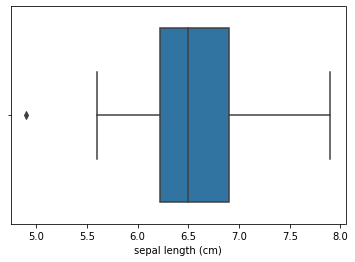

In [ ]:
sns.boxplot(df[df['target'] == 2].iloc[:, 0])

In [ ]:
outlier2 = df[df['target'] == 2][(df.iloc[:, 1] <= 2.2)| (df.iloc[:, 1] >= 3.8)| (df.iloc[:, 0] < 5.0)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
outlier2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
106,4.9,2.5,4.5,1.7,2.0
117,7.7,3.8,6.7,2.2,2.0
119,6.0,2.2,5.0,1.5,2.0
131,7.9,3.8,6.4,2.0,2.0


In [ ]:
#Tập hợp tất cả các điểm outlier
outlier = pd.concat([outlier0, outlier1, outlier2])

In [ ]:
outlier

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
13,4.3,3.0,1.1,0.1,0.0
15,5.7,4.4,1.5,0.4,0.0
22,4.6,3.6,1.0,0.2,0.0
23,5.1,3.3,1.7,0.5,0.0
24,4.8,3.4,1.9,0.2,0.0
41,4.5,2.3,1.3,0.3,0.0
43,5.0,3.5,1.6,0.6,0.0
44,5.1,3.8,1.9,0.4,0.0
98,5.1,2.5,3.0,1.1,1.0
106,4.9,2.5,4.5,1.7,2.0


In [ ]:
#Tạo tập dữ liệu mới không chứ outlier
new_df = df[~df.index.isin(outlier.index)]
new_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


**STEP2: Thực hiện xây dựng model và đánh giá theo 2 kịch bản**

Kịch bản 1: Chọn ngẫu nhiên 40 mẫu hoa mỗi loại đưa vào tập huấn luyện (tổng cộng 120 mẫu). Dùng k-NN để xác định 30 mẫu còn lại thuộc loại nào và đánh giá độ chính xác accuracy trên tổng thể, precision và recall cho từng loại hoa. (k do học viên thử nghiệm và chọn).

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Split data to train and set 
train, test = train_test_split (df, test_size = 0.2, stratify = df['target'], random_state = 42) #random_state = 42 to fix random sampling, #stratify to keep the proportion equal to total 

In [ ]:
train[train['target'] == 2].index

Int64Index([106, 146, 133, 135, 117, 105, 108, 137, 131, 103, 111, 121, 139,
            148, 144, 130, 101, 100, 149, 136, 142, 113, 122, 115, 119, 129,
            145, 123, 114, 120, 109, 110, 124, 118, 112, 126, 143, 125, 102,
            128],
           dtype='int64')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as knn

In [ ]:
#Conduct KNN model with k = 10
model = knn(n_neighbors = 10 ) 
model.fit(train.iloc[ : , 0:4 ], train.iloc[ : , 4 ] )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
model_predict = model.predict(test.iloc[ : , 0 : 4])

In [ ]:
test['predict'] = model_predict

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,predict
38,4.4,3.0,1.3,0.2,0.0,0.0
127,6.1,3.0,4.9,1.8,2.0,2.0
57,4.9,2.4,3.3,1.0,1.0,1.0
93,5.0,2.3,3.3,1.0,1.0,1.0
42,4.4,3.2,1.3,0.2,0.0,0.0


In [ ]:
from sklearn import metrics

In [ ]:
print("Accuray:", metrics.accuracy_score(test['target'],  model_predict) )

Accuray: 1.0


**Nhận xét: với kịch bản 1, kết quả trả ra cho thấy độ chính xác lên tới 100% do đó precision và recall cho từng loài hoa cũng sẽ đạt 100%**

Kịch bản 2: Chọn ngẫu nhiên 30 mẫu hoa mỗi loại đưa vào tập huấn luyện (tổng cộng 90 mẫu). Dùng k-NN để xác định 60 mẫu còn lại thuộc loại nào và đánh giá độ chính xác accuracy trên tổng thể, precision và recall cho từng loại hoa. (k bằng giá trị đã chọn ở trên). Nhận xét về kết quả thu được.

In [ ]:
train2, test2 = train_test_split(df, test_size = 0.4, stratify = df['target'], random_state = 42)

In [ ]:
model2 = knn(n_neighbors = 10)

In [ ]:
model2.fit(train2.iloc[ : , 0:4], train2.iloc[ : , 4 ])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
model_predict2 = model2.predict(test2.iloc [ : , 0: 4]) 

In [ ]:
test2['predict'] = model_predict2
test2['compare'] = (test2['predict']==test2['target'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
test2.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,predict,compare
40,5.0,3.5,1.3,0.3,0.0,0.0,True
61,5.9,3.0,4.2,1.5,1.0,1.0,True
18,5.7,3.8,1.7,0.3,0.0,0.0,True
49,5.0,3.3,1.4,0.2,0.0,0.0,True
106,4.9,2.5,4.5,1.7,2.0,1.0,False
20,5.4,3.4,1.7,0.2,0.0,0.0,True
69,5.6,2.5,3.9,1.1,1.0,1.0,True
93,5.0,2.3,3.3,1.0,1.0,1.0,True
141,6.9,3.1,5.1,2.3,2.0,2.0,True
104,6.5,3.0,5.8,2.2,2.0,2.0,True


In [ ]:
#Tính accuray 
metrics.accuracy_score(test2.iloc[ :, 4], model_predict2)

0.9666666666666667

In [ ]:
# Tính recall cho từng loài hoa
recall = test2[test2['compare'] == True]['compare'].groupby(test2['predict']).count()/ test2['compare'].groupby(test2['target']).count()
recall = pd.DataFrame(recall)
recall['flowername'] = iris.target_names
recall

,compare,flowername
predict,,
0.0,1.0,setosa
1.0,1.0,versicolor
2.0,0.9,virginica


In [ ]:
#Tính precision cho từng loài hoa
precision = test2[test2['compare'] == True]['compare'].groupby(test2['predict']).count()/ test2['compare'].groupby(test2['predict']).count()
precision = pd.DataFrame(precision)
precision['flowername'] = iris.target_names
precision

,compare,flowername
predict,,
0.0,1.000000,setosa
1.0,0.909091,versicolor
2.0,1.000000,virginica


**Nhận xét: Độ chính xác trên tổng thể là 96.67 % theo kịch bản 2 do dự đoán nhầm loài hoa thuộc họ virginica  (nhóm 2) sang họ versicolor (nhóm 1)**

**STEP3: Thử tính toán lại kịch bản 2 sau khi bỏ outlier và thay đổi lựa chọn major voting thành ưu tiên các điểm có khoảng cách gần**

In [ ]:
#Split tập dữ liệu dựa trên tập new_df không chưa outliers
train3, test3 = train_test_split(new_df, test_size = 0.4, stratify = new_df['target'], random_state = 42)

In [ ]:
train3.groupby(train3['target']).count()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0.0,25,25,25,25
1.0,29,29,29,29
2.0,28,28,28,28


In [ ]:
new_df.groupby(new_df['target']).count()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0.0,42,42,42,42
1.0,49,49,49,49
2.0,46,46,46,46


In [ ]:
#Lựa chọn weights = "uniform" thì  mức độ ảnh hưởng đến kết quả của 10 điểm lân cận đều như nhau
model3 = knn(n_neighbors  = 10, weights= "uniform")

In [ ]:
model3.fit(train3.iloc[ : , 0:4], train3.iloc[ : , 4 ])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
model_predict3 = model3.predict(test3.iloc[ : , 0:4])
test3['predict'] = model_predict3
test3['compare'] = (test3['predict']==test3['target'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print("accuracy is:", metrics.accuracy_score(test3['target'], test3['predict']))

accuracy is: 0.9818181818181818


**Kết luận: Sau khi loại bỏ outlier, độ chính xác của thuật toán theo kịch bản 2 tăng lên 98,2% (so với trước đó là 96,67%)**


In [ ]:
#Thử tính toán lại model sau khi loại bỏ outler và thay đổi trọng số ảnh hưởng của các điểm lân cận (ưu tiên điểm có khoảng cách gần)
model4 = knn(n_neighbors  = 10, weights= "distance")

In [ ]:
model4.fit(train3.iloc[ : , 0:4], train3.iloc[ : , 4 ])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='distance')

In [ ]:
model_predict4 = model4.predict(test3.iloc[ : , 0:4])
test3['predict2'] = model_predict4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print("accuracy is:", metrics.accuracy_score(test3['target'], test3['predict2']))

accuracy is: 1.0


Như vậy, có thể kết luận:
- Thuật toán KNN khá nhạy cảm với outliers.
- Việc chọn k cũng khá quan trọng vì nếu k nhỏ thì khả năng dự đoán sai nếu gần các điểm nhiễu sẽ rất cao, ở đây chọn k = 10, gần bằng với căn bậc hai của số phần tử mẫu.
- Việc lựa chọn mức độ ảnh hưởng dựa theo khoảng cách cũng ảnh hưởng đến độ chính xác thuật toán (ở đây sau khi lựa chọn các điểm ở gần có trọng số cao hơn giúp kết quá tốt hơn, tăng từ 98% lên 100%).